In [49]:
""" Running all the experiments in the paper """

import matplotlib as mpl
import matplotlib.pyplot as plt

from experiments.change_sd import change_sd
from agents.hum_mac_agent import NoisyDriverAgent
from environments.env_types import ENV1, ENV2, ENV3, ENV3_LIGHT_TRAFFIC
from experiments.known_unknown_experiment import CellBasedSwitchingExperiment, SensorBasedSwitchingExperiment
from plot.plot_regret import *
import numpy as np

from IPython.display import Image
from wand.image import Image as WImage

In [11]:
# Define the human and machine agents.

machine = NoisyDriverAgent(noise_sd=4)
human = NoisyDriverAgent(noise_sd=1, car_fear=0.4)

## Known human cell-based state space

{'exp_cost': 8.998000000000081, 'env_cost': 7.34, 'human_control_rate': 0.5877777777777777, 'exp_switch': 3.0}


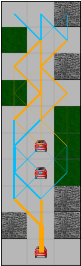

In [14]:
""" Known human cell-based state space (Figure 2.a in the paper) """

# Choose `env_type` from `ENV1, ENV2, ENV3`

cell_based_experiment = CellBasedSwitchingExperiment(env_type=ENV2, machine_agent=machine, human_agent=human)
result = cell_based_experiment.run_known_human_exp(human_cost=0.2, switching_cost=0.2, n_try=100,
                                          plot_name='Env2_known_cell_based_0_2_0_2')

print(result)
Image('outputs/Env2_known_cell_based_0_2_0_2.png', height=300, width=90)

## Known human sensor-based state space

{'exp_cost': 9.593999999999973, 'env_cost': 8.91, 'human_control_rate': 0.2733333333333333, 'exp_switch': 1.71}


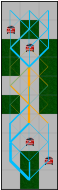

In [57]:
""" Known human sensor-based state space (Figure 2.b in the paper) """

# Choose `env_type` from `ENV1, ENV2, ENV3`

sensor_based_experiment = SensorBasedSwitchingExperiment(env_type=ENV3, machine_agent=machine, human_agent=human)
result = sensor_based_experiment.run_known_human_exp(human_cost=0, switching_cost=0.4, n_try=100,
                                            plot_name='Env3_known_sensor_based_0_0_4')

print(result)
Image('outputs/Env3_known_sensor_based_0_0_4.png', height=300, width=90)

## Unknown human sensor-based state space

In [46]:
""" Unknown human sensor-based state space. It may take a while (Figure 3 and 5 in the paper) """

# Choose `env_type` from `ENV3, ENV3_LIGHT_TRAFFIC`

sensor_based_experiment = SensorBasedSwitchingExperiment(env_type=ENV3, machine_agent=machine, human_agent=human)

# `plot_epochs`: Episode numbers in which the trajectory of algorithm 2 will be plotted. 
# The plotted trajectories are in `outputs/epoch_plots`

alg2_regret, greedy_regret = sensor_based_experiment.run_unknown_human_exp(n_episode=3000, human_cost=0.2,
                                                                           switching_cost=0.1, n_try=100,
                                                                           plot_epochs=[5, 500, 2999],
                                                                           plot_dir='epoch_plots/')

################### Episode 0 ###################
algorithm 2 cumulative regret: 1.1779999999999706
greedy algorithm cumulative regret: 0.23799999999997112


<Figure size 360x222.492 with 0 Axes>

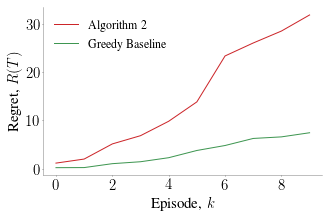

In [56]:
# plot the regret result

width = 5
height = width * golden_ratio

latexify(fig_height=height, fig_width=width, font_size=15, legend_size=12)

plt.figure(1)
fig, ax = plt.subplots()
ax = format_axes(ax)

ax.plot(np.cumsum(alg2_regret), COLORS[1], label=r'Algorithm 2', linestyle='solid',
        linewidth=1)
ax.plot(np.cumsum(greedy_regret), COLORS[0], label=r'Greedy Baseline', linestyle='solid',
        linewidth=1)

ax.set_ylabel(r'Regret, $R(T)$')
ax.set_xlabel(r'Episode, $k$')
ax.legend(frameon=False)


## Human control and number of swithces

In [58]:
"""human control and number of switches. It may take a while (Figure 4 in the paper)"""

# Choose `env_type` from `ENV1, ENV2`

# `sd_range`: Range of noise standard deviation for human action policy
sd_range = np.arange(6)
human_control_rate, switch_number = change_sd(env_type=ENV2, sd_range=np.arange(6), env_num=100, human=human,
                                              machine=machine, switching_cost=0.2, human_cost=0.1, n_try=100)


################### SD: 0 ###################
average human percentage: 68.18111111111112
average number of switches: 1.7543000000000006
################### SD: 1 ###################
average human percentage: 49.89777777777777
average number of switches: 2.5532999999999997
################### SD: 2 ###################
average human percentage: 40.92555555555557
average number of switches: 2.0884000000000005
################### SD: 3 ###################
average human percentage: 17.15555555555556
average number of switches: 1.2716
################### SD: 4 ###################
average human percentage: 1.3188888888888888
average number of switches: 0.13640000000000002
################### SD: 5 ###################
average human percentage: 0.0
average number of switches: 0.0


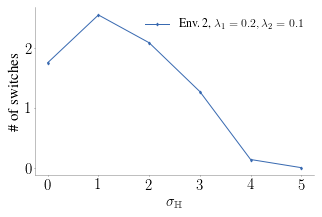

In [64]:
# plot number of switches vs noise variance of the human policy

fig, ax = plt.subplots()
ax = format_axes(ax)
line_width = 1
ax.plot(sd_range, switch_number, COLORS[2], label=r'Env.\,2, $\lambda_1=0.2, \lambda_2=0.1$', linestyle='solid',
        linewidth=line_width, marker='d', ms=2)

ax.set_ylabel(r'\# of switches')
ax.set_xlabel(r'$\sigma_{\mathbb{H}}$')
ax.legend(frameon=False)

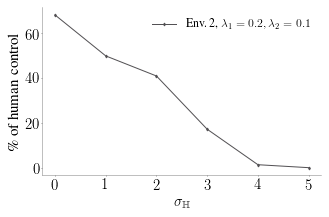

In [63]:
# plot number of switches vs noise variance of the human policy

fig, ax = plt.subplots()
ax = format_axes(ax)
line_width = 1
ax.plot(sd_range, human_control_rate, COLORS[3], label=r'Env.\,2, $\lambda_1=0.2, \lambda_2=0.1$', linestyle='solid',
        linewidth=line_width, marker='d', ms=2)

ax.set_ylabel(r'\% of human control')
ax.set_xlabel(r'$\sigma_{\mathbb{H}}$')
ax.legend(frameon=False)